In [1]:
#%cd C:/Users/Mathieu/Desktop/Projets/Benter
%cd /home/mathieu/Mindsay/mathieu/Benter-Project

/home/mathieu/Mindsay/mathieu/Benter-Project


In [2]:
%matplotlib inline
import collections
import functools

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from tqdm import tqdm


from utils import import_data
from winning_horse_models.logistic_regression import LogisticRegressionModel
from constants import PMU_BETTINGS, SOURCE_PMU
from utils.wagering_stategy import compute_expected_return, compute_scenario, plot_scenario
import wagering_stategies
from wagering_stategies import factories as wagering_factories

from matplotlib import style
style.use('ggplot')

In [3]:
winning_model = LogisticRegressionModel.load_model(trainable=False)

In [4]:
%%time
random_e_r_df = compute_expected_return(
                    compute_betting_fun=wagering_stategies.race_random_one_horse,
                    source=SOURCE_PMU,
                    code_pari="E_SIMPLE_GAGNANT",
                    winning_model=winning_model,
                ) 

  0%|          | 0/11929 [00:00<?, ?it/s]/home/mathieu/Mindsay/mathieu/Benter-Project/utils/import_data.py:207: DtypeWarning: Columns (35,46,47,61,62,63,64,87) have mixed types.Specify dtype option on import or set low_memory=False.
  rh_df = get_split_date(source=source, on_split=on_split)
/home/mathieu/.pyenv/versions/3.7.4/envs/venv_benter/lib/python3.7/site-packages/pandas-1.0.4-py3.7-linux-x86_64.egg/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/mathieu/Mindsay/mathieu/Benter-Project/utils/preprocess.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

CPU times: user 18min 35s, sys: 6.63 s, total: 18min 41s
Wall time: 18min 41s


In [5]:
random_e_r_df.relative_expected_return.mean()

-0.27648252600646456

In [6]:
random_e_r_df.relative_expected_return.std()

3.758039680694984

In [43]:
random_e_r_df.mean()

betting_fraction                 1.000000
bet_size                      1500.000000
expected_return               -414.723789
relative_expected_return        -0.276483
computed_bets_on_n_horses        1.000000
actual_bets_on_n_horses          1.000000
n_horse                         11.590242
race_id                      95130.787828
dtype: float64

In [7]:
%%time
expected_return_df=compute_expected_return(compute_betting_fun=wagering_stategies.race_betting_best_expected_return,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

CPU times: user 34min 8s, sys: 14.9 s, total: 34min 23s
Wall time: 34min 17s


In [8]:
%%time
best_proba_expected_return_df=compute_expected_return(compute_betting_fun=wagering_stategies.race_betting_best_winning_proba,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

CPU times: user 25min 26s, sys: 11.2 s, total: 25min 38s
Wall time: 25min 26s


In [9]:
%%time
pmp_expected_return_df = compute_expected_return(compute_betting_fun=wagering_stategies.race_proportional_pari_mutual_proba,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

CPU times: user 13min 47s, sys: 6.03 s, total: 13min 53s
Wall time: 13min 38s


In [10]:
expected_return_df.relative_expected_return.mean()

-0.32151807848540975

In [11]:
expected_return_df.relative_expected_return.std()

5.6402958354259445

In [12]:
best_proba_expected_return_df.relative_expected_return.mean()

-0.12417047926753538

In [13]:
best_proba_expected_return_df.relative_expected_return.std()

2.1178143979495565

In [14]:
pmp_expected_return_df.relative_expected_return.mean()

-0.12769900271935938

In [15]:
pmp_expected_return_df.relative_expected_return.std()

0.6308629839436104

In [16]:
for n_horse, n_horse_er_df in expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.relative_expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(expected_return_df):.2%}" )


3 1.3117390988649826 2 0.02%
4 -0.7748320001403909 30 0.25%
5 -0.6163911132097125 183 1.53%
6 -0.004047570277969413 435 3.65%
7 -0.27710268458716025 772 6.47%
8 -0.3059053360140612 1060 8.89%
9 -0.4861842656892479 1044 8.75%
10 -0.28019486054648335 1262 10.58%
11 -0.5228474325573496 1164 9.76%
12 -0.3709331429800365 1452 12.17%
13 -0.3566179213027394 808 6.77%
14 -0.053282076605058744 1069 8.96%
15 -0.47504151094108166 621 5.21%
16 -0.17831442655172225 1360 11.40%
17 -0.5530718478682148 153 1.28%
18 -0.31324663953137777 477 4.00%
19 -1.0 9 0.08%
20 -1.0 23 0.19%
22 -1.0 1 0.01%
24 -1.0 4 0.03%


In [17]:
for n_horse, n_horse_er_df in best_proba_expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.relative_expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(best_proba_expected_return_df):.2%}" )


3 -0.3809598540145985 2 0.02%
4 -0.4052423156191018 30 0.25%
5 -0.29996101586561413 183 1.53%
6 -0.003516378699618374 435 3.65%
7 -0.14943597953346482 772 6.47%
8 -0.19835672246934055 1060 8.89%
9 -0.12817919363887237 1044 8.75%
10 -0.123516087610548 1262 10.58%
11 -0.12452632972776825 1164 9.76%
12 -0.12403280982364673 1452 12.17%
13 -0.16495136866913668 808 6.77%
14 -0.10585825804444332 1069 8.96%
15 -0.07703498795471606 621 5.21%
16 -0.06716680757462547 1360 11.40%
17 -0.257540138595964 153 1.28%
18 -0.06483464100216753 477 4.00%
19 0.6818991830458244 9 0.08%
20 -1.0 23 0.19%
22 -1.0 1 0.01%
24 0.5742112277867528 4 0.03%


In [18]:
for n_horse, n_horse_er_df in pmp_expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.relative_expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(pmp_expected_return_df):.2%}" )


3 -0.1390295594992869 2 0.02%
4 -0.08696399422259632 30 0.25%
5 -0.09047137007246815 183 1.53%
6 -0.14761883082139873 435 3.65%
7 -0.14525551863443306 772 6.47%
8 -0.1377955104224105 1060 8.89%
9 -0.1496898927920435 1044 8.75%
10 -0.13734334882661528 1262 10.58%
11 -0.15255253315550962 1164 9.76%
12 -0.1352079321632391 1452 12.17%
13 -0.11937433806511999 808 6.77%
14 -0.11975655355361567 1069 8.96%
15 -0.11063232513222314 621 5.21%
16 -0.11968476557251158 1360 11.40%
17 -0.039487898527901674 153 1.28%
18 -0.015929612620377318 477 4.00%
19 -0.09143855002308376 9 0.08%
20 -0.3436000700060764 23 0.19%
22 -1.0 1 0.01%
24 0.3367869262147889 4 0.03%


In [19]:
%%time
not_max_odds_expected_return_df = compute_expected_return(compute_betting_fun=wagering_stategies.race_betting_best_winning_proba_not_max_pari_mutual_proba,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)



CPU times: user 18min 36s, sys: 8.16 s, total: 18min 44s
Wall time: 18min 23s


In [20]:
not_max_odds_expected_return_df.relative_expected_return.mean()

-0.1327048419647133

In [21]:
not_max_odds_expected_return_df.relative_expected_return.std()

2.6137311768101523

In [22]:
%%time
kelly_expected_return = compute_expected_return(
    compute_betting_fun=wagering_stategies.race_bettings_kelly,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model,
) 

  0%|          | 0/11929 [00:00<?, ?it/s]/home/mathieu/Mindsay/mathieu/Benter-Project/utils/wagering_stategy.py:82: RuntimeWarning: invalid value encountered in double_scalars
  relative_expected_return = expected_return / np.sum(actual_betting)
                                                     

CPU times: user 18min 28s, sys: 8.42 s, total: 18min 37s
Wall time: 18min 16s


In [23]:
kelly_expected_return.relative_expected_return.mean()

-0.2959950094962957

In [24]:
kelly_expected_return.relative_expected_return.std()

4.0948824946292905

In [25]:
%%time
res={}
for minimum_winning_proba in np.arange(0.0, 0.41, 0.1):
    for minimum_expected_return in np.arange(0.0, 10.1, 2):
        e_r_df = compute_expected_return(
                    compute_betting_fun=wagering_factories.betting_on_best_exp_return_thresholded_winning_proba_expected_returns_factory(minimum_winning_probabilities=minimum_winning_proba, 
                                                                                                                                                      expected_return_threshold=minimum_expected_return),
                    source=SOURCE_PMU,
                    code_pari="E_SIMPLE_GAGNANT",
                    winning_model=winning_model,
                ) 
        print(minimum_winning_proba, minimum_expected_return, e_r_df.relative_expected_return.mean(),e_r_df.relative_expected_return.std())
        res[(minimum_winning_proba,minimum_expected_return)]={'mean':e_r_df.relative_expected_return.mean(), 'std':e_r_df.relative_expected_return.std()}

  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 0.0 -0.32151807848540975 5.6402958354259445


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 2.0 -0.3385156082326624 6.2107855682749955


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 4.0 -0.48661610879243106 5.722053031674274


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 6.0 -0.5824165286889024 5.694095445409128


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 8.0 -0.539540570732568 5.940279928464801


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.0 10.0 -0.49568907082802677 6.3376097389627235


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 0.0 -0.15511735401116386 3.504074374248594


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 2.0 -0.20374374854334878 4.692604055430711


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 4.0 -0.2946221630485606 5.529264712037616


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 6.0 -0.461299974414971 6.067361347343549


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 8.0 -0.24169305540564606 7.763718296598329


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.1 10.0 0.3944704887171341 10.501924941450142


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 0.0 -0.12220165136950432 2.1352829183645468


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 2.0 -0.10622406751259254 3.4087315513350944


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 4.0 -0.24496219675649317 3.8020581979060393


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 6.0 -0.5905794367722911 3.1323834390096676


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 8.0 -0.5022008021390374 4.044139801219436


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.2 10.0 -0.1986647058823529 5.131049444075087


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 0.0 -0.14269706524558698 1.6263056430175904


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 2.0 -0.19501732289117424 2.8915897678657787


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 4.0 -0.03814851304563614 4.1527909105364715


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 6.0 0.0596767518834818 5.000414137881812


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 8.0 0.21684248366013076 6.322899019522944


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.30000000000000004 10.0 0.6427373529411765 7.34654478070907


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.4 0.0 -0.14191556709165945 1.198370284297412


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.4 2.0 -0.33899606863973364 1.8521768400201584


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.4 4.0 -0.7797932755450486 1.3035255366959033


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.4 6.0 -0.6295868085106383 1.8520659574468086


  0%|          | 0/11929 [00:00<?, ?it/s]            

0.4 8.0 -1.0 0.0


0.4 10.0 -1.0 0.0
CPU times: user 9h 17min 40s, sys: 3min 58s, total: 9h 21min 39s
Wall time: 9h 11min 12s


In [26]:
print(res)

{(0.0, 0.0): {'mean': -0.32151807848540975, 'std': 5.6402958354259445}, (0.0, 2.0): {'mean': -0.3385156082326624, 'std': 6.2107855682749955}, (0.0, 4.0): {'mean': -0.48661610879243106, 'std': 5.722053031674274}, (0.0, 6.0): {'mean': -0.5824165286889024, 'std': 5.694095445409128}, (0.0, 8.0): {'mean': -0.539540570732568, 'std': 5.940279928464801}, (0.0, 10.0): {'mean': -0.49568907082802677, 'std': 6.3376097389627235}, (0.1, 0.0): {'mean': -0.15511735401116386, 'std': 3.504074374248594}, (0.1, 2.0): {'mean': -0.20374374854334878, 'std': 4.692604055430711}, (0.1, 4.0): {'mean': -0.2946221630485606, 'std': 5.529264712037616}, (0.1, 6.0): {'mean': -0.461299974414971, 'std': 6.067361347343549}, (0.1, 8.0): {'mean': -0.24169305540564606, 'std': 7.763718296598329}, (0.1, 10.0): {'mean': 0.3944704887171341, 'std': 10.501924941450142}, (0.2, 0.0): {'mean': -0.12220165136950432, 'std': 2.1352829183645468}, (0.2, 2.0): {'mean': -0.10622406751259254, 'std': 3.4087315513350944}, (0.2, 4.0): {'mean':

In [27]:
[(k,v) for k,v in res.items() if v['mean']==max(val['mean'] for val in res.values())]

[((0.30000000000000004, 10.0),
  {'mean': 0.6427373529411765, 'std': 7.34654478070907})]

In [47]:
sorted(res.items(), key=lambda kv:kv[1]['mean'], reverse=True)

[((0.30000000000000004, 10.0),
  {'mean': 0.6427373529411765, 'std': 7.34654478070907}),
 ((0.1, 10.0), {'mean': 0.3944704887171341, 'std': 10.501924941450142}),
 ((0.30000000000000004, 8.0),
  {'mean': 0.21684248366013076, 'std': 6.322899019522944}),
 ((0.30000000000000004, 6.0),
  {'mean': 0.0596767518834818, 'std': 5.000414137881812}),
 ((0.30000000000000004, 4.0),
  {'mean': -0.03814851304563614, 'std': 4.1527909105364715}),
 ((0.2, 2.0), {'mean': -0.10622406751259254, 'std': 3.4087315513350944}),
 ((0.2, 0.0), {'mean': -0.12220165136950432, 'std': 2.1352829183645468}),
 ((0.4, 0.0), {'mean': -0.14191556709165945, 'std': 1.198370284297412}),
 ((0.30000000000000004, 0.0),
  {'mean': -0.14269706524558698, 'std': 1.6263056430175904}),
 ((0.1, 0.0), {'mean': -0.15511735401116386, 'std': 3.504074374248594}),
 ((0.30000000000000004, 2.0),
  {'mean': -0.19501732289117424, 'std': 2.8915897678657787}),
 ((0.2, 10.0), {'mean': -0.1986647058823529, 'std': 5.131049444075087}),
 ((0.1, 2.0), {'

In [31]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

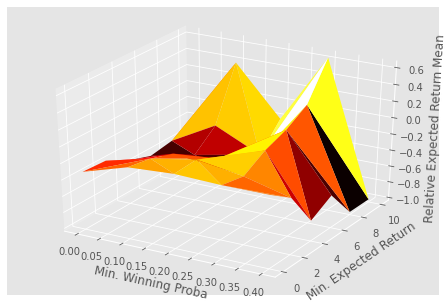

In [42]:
fig = pylab.figure()
ax = Axes3D(fig)
X = np.array([k[0] for k in res.keys()])
Y = np.array([k[1] for k in res.keys()])

Z = np.array([v['mean'] for v in res.values()])
ax.set_xlabel('Min. Winning Proba')
ax.set_ylabel('Min. Expected Return')
ax.set_zlabel('Relative Expected Return Mean')

ax.plot_trisurf(X, Y, Z, cmap='hot')

show()

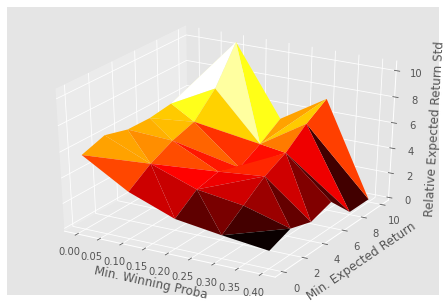

In [41]:
fig = pylab.figure()
ax = Axes3D(fig)
X = np.array([k[0] for k in res.keys()])
Y = np.array([k[1] for k in res.keys()])

Z = np.array([v['std'] for v in res.values()])

ax.plot_trisurf(X, Y, Z, cmap='hot')

ax.set_xlabel('Min. Winning Proba')
ax.set_ylabel('Min. Expected Return')
ax.set_zlabel('Relative Expected Return Std')
show()